In [1]:
# %% IMPORTS
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import pygimli           as pg
import pygimli.meshtools as mt
import cmasher           as cmr
import pyvista           as pyv
import functools
import sys

from mpl_toolkits               import mplot3d
from mpl_toolkits.mplot3d       import Axes3D
from pygimli.viewer             import pv
from PlotFunctions_Ch5          import *

%matplotlib qt

In [2]:
# %% Filenames
fig_dir = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/'
fn_dir  = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Rockeskyll/'

fn_magnetic = 'Magnetic_data_corrected.csv'

fn_all = 'ert_data_rockes_all'
geo1 ='Geo/2023_ERTL1_Locations.csv'
geo2 ='Geo/2023_ERTL2_Locations.csv'
geo3 ='Geo/2023_ERTL3_Locations.csv'
geo4 ='Geo/2023_ERTL4_Locations.csv'


# # Results JME1_1
# JME1 = 'JME1_1'
# fn_sus_jme1 = 'Res_'+JME1+'/sus_jme.npy'
# fn_res_jme1 = 'Res_'+JME1+'/res_jme.npy'
# fn_misfit_mag_jme1 = 'Res_'+JME1+'/misfit_mag_jme.npy'
# fn_misfit_ert_jme1 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# # Results JME1_2
# JME1 = 'JME1_4'
# fn_sus_jme2 = 'Res_'+JME1+'/sus_jme.npy'
# fn_res_jme2 = 'Res_'+JME1+'/res_jme.npy'
# fn_misfit_mag_jme2 = 'Res_'+JME1+'/misfit_mag_jme.npy'
# fn_misfit_ert_jme2 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_3
JME1 = 'JME1_3'
fn_sus_jme3 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme3 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme3 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme3 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_4
JME1 = 'JME1_5'
fn_sus_jme4 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme4 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme4 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme4 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Results JME1_5
JME1 = 'JME1_8'
fn_sus_jme5 = 'Res_'+JME1+'/sus_jme.npy'
fn_res_jme5 = 'Res_'+JME1+'/res_jme.npy'
fn_misfit_mag_jme5 = 'Res_'+JME1+'/misfit_mag_jme.npy'
fn_misfit_ert_jme5 = 'Res_'+JME1+'/misfit_ert_jme.npy'

# Plotting
c_ert = 'gnuplot'
c_mag = cmr.tropical

lim_ert = [20,400]
lim_mag =[0,0.15]

## Load Geometries and Meshes

In [3]:
df = pd.read_csv(fn_dir+fn_magnetic, delimiter=',', decimal='.')
pnts = np.array([[df['X'][i], df['Y'][i], df['Z'][i]] for i in range(len(df))])

df1 = pd.read_csv(fn_dir+geo1, delimiter=',', decimal='.')
p1 = np.array([[df1['X'][i], df1['Y'][i], df1['Z'][i]] for i in range(len(df1))])

df2 = pd.read_csv(fn_dir+geo2, delimiter=',', decimal='.')
p2 = np.array([[df2['X'][i], df2['Y'][i], df2['Z'][i]] for i in range(len(df2))])

df3 = pd.read_csv(fn_dir+geo3, delimiter=',', decimal='.')
p3 = np.array([[df3['X'][i], df3['Y'][i], df3['Z'][i]] for i in range(len(df3))])
p3 = p3[:-1,:] # This array has one electrode too much :(

df4 = pd.read_csv(fn_dir+geo4, delimiter=',', decimal='.')
p4 = np.array([[df4['X'][i], df4['Y'][i], df4['Z'][i]] for i in range(len(df4))])

mesh = pg.load(fn_dir+'invmesh.bms')
m2d1 = pg.load(fn_dir+'mesh_2d1.bms')
m2d2 = pg.load(fn_dir+'mesh_2d2.bms')
m2d3 = pg.load(fn_dir+'mesh_2d3.bms')
m2d4 = pg.load(fn_dir+'mesh_2d4.bms')

#Coverage 
cov1 = np.load(fn_dir+'Res_Conventional/cov1.npy')
cov2 = np.load(fn_dir+'Res_Conventional/cov2.npy')
cov3 = np.load(fn_dir+'Res_Conventional/cov3.npy')
cov4 = np.load(fn_dir+'Res_Conventional/cov4.npy')

## Load Results

In [4]:
# res_jme1 = np.load(fn_dir+fn_res_jme1)
# sus_jme1 = np.load(fn_dir+fn_sus_jme1)

# res_jme2 = np.load(fn_dir+fn_res_jme2)
# sus_jme2 = np.load(fn_dir+fn_sus_jme2)

res_jme3 = np.load(fn_dir+fn_res_jme3)
sus_jme3 = np.load(fn_dir+fn_sus_jme3)

res_jme4 = np.load(fn_dir+fn_res_jme4)
sus_jme4 = np.load(fn_dir+fn_sus_jme4)

res_jme5 = np.load(fn_dir+fn_res_jme5)
sus_jme5 = np.load(fn_dir+fn_sus_jme5)

## Load Misfit

In [5]:
# misfit_mag_jme1 = np.load(fn_dir+fn_misfit_mag_jme1)
# misfit_ert_jme1 = np.load(fn_dir+fn_misfit_ert_jme1)

# misfit_mag_jme2 = np.load(fn_dir+fn_misfit_mag_jme2)
# misfit_ert_jme2 = np.load(fn_dir+fn_misfit_ert_jme2)

misfit_mag_jme3 = np.load(fn_dir+fn_misfit_mag_jme3)
misfit_ert_jme3 = np.load(fn_dir+fn_misfit_ert_jme3)

misfit_mag_jme4 = np.load(fn_dir+fn_misfit_mag_jme4)
misfit_ert_jme4 = np.load(fn_dir+fn_misfit_ert_jme4)

misfit_mag_jme5 = np.load(fn_dir+fn_misfit_mag_jme5)
misfit_ert_jme5 = np.load(fn_dir+fn_misfit_ert_jme5)

## Interpolate 2D Sections !!!Change to nearest instead of linear!!!

### Load indices (if they already exist)

In [6]:
idx1 = np.load(fn_dir+'int_ind1.npy')
idx2 = np.load(fn_dir+'int_ind2.npy')
idx3 = np.load(fn_dir+'int_ind3.npy')
idx4 = np.load(fn_dir+'int_ind4.npy')
idx_all_list = [idx1,idx2,idx3,idx4]

### Interpolate data to 2D section (linear and nearest neighbour method)

In [7]:
def Transfer3DdataTo2DSection(data, int_idx_all, x=1):
    data_intnn = []
    for int_idx in int_idx_all:
        d_int = []
        for i in int_idx:
            if np.isnan(i):
                d_int.append(x)
            else:
                d_int.append(data[int(i)])
        data_intnn.append(np.array(d_int))
    return data_intnn

In [8]:
p_list = [p1,p2,p3,p4]
m_list = [m2d1,m2d2,m2d3,m2d4]

# With nearest neighbour interpolation
# res_jme1_int_nn = Transfer3DdataTo2DSection(res_jme1, idx_all_list, x=30)
# sus_jme1_int_nn = Transfer3DdataTo2DSection(sus_jme1, idx_all_list, x=0.01)

# res_jme2_int_nn = Transfer3DdataTo2DSection(res_jme2, idx_all_list, x=30)
# sus_jme2_int_nn = Transfer3DdataTo2DSection(sus_jme2, idx_all_list, x=0.01)

res_jme3_int_nn = Transfer3DdataTo2DSection(res_jme3, idx_all_list, x=30)
sus_jme3_int_nn = Transfer3DdataTo2DSection(sus_jme3, idx_all_list, x=0.01)

res_jme4_int_nn = Transfer3DdataTo2DSection(res_jme4, idx_all_list, x=30)
sus_jme4_int_nn = Transfer3DdataTo2DSection(sus_jme4, idx_all_list, x=0.01)

res_jme5_int_nn = Transfer3DdataTo2DSection(res_jme5, idx_all_list, x=30)
sus_jme5_int_nn = Transfer3DdataTo2DSection(sus_jme5, idx_all_list, x=0.01)

## Inspect Models

### Show different inversion results

In [9]:
l1 = mt.createPolygon([[10,409],[7,416],[1.8,418],[1.5,424],[7,429],[32,427],[38,437],[34,444],[68,436],[83,430],[86,423],[82,415],[77,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l2 = mt.createPolygon([[13,409],[7.8,418],[6,424],[4.2,433],[32,423],[38,437],[42,442],[68,436],[83,437],[92,423],[78,414],[75,409]],
                      isClosed=False, addNodes=5, interpolate='spline')

l3 = mt.createPolygon([[6,409],[1.2,418],[0.1,424],[1.6,429],[24,423],[47,435],[68,436],[74,430],[90,430],[92,424],[87,419],[81,411]],
                      isClosed=False, addNodes=5, interpolate='spline')

l4 = mt.createPolygon([[61,410],[59,416],[53,422],[52,432],[58,435],[66,432],[78,437],[88,433],[97,435],[107,431],[106,421],[99,417],[96,412]],
                      isClosed=False, addNodes=5, interpolate='spline')

### Compare weightings

In [11]:
chi_1_1 = np.load(fn_dir+'Res_JME1_3/ChiHistory_jme.npy')
chi_100_1 = np.load(fn_dir+'Res_JME1_5/ChiHistory_jme.npy')
chi_1_100 = np.load(fn_dir+'Res_JME1_8/ChiHistory_jme.npy')

S_1_1 = np.load(fn_dir+'Res_JME1_3/SHistory_jme.npy')
S_100_1 = np.load(fn_dir+'Res_JME1_5/SHistory_jme.npy')
S_1_100 = np.load(fn_dir+'Res_JME1_8/SHistory_jme.npy')

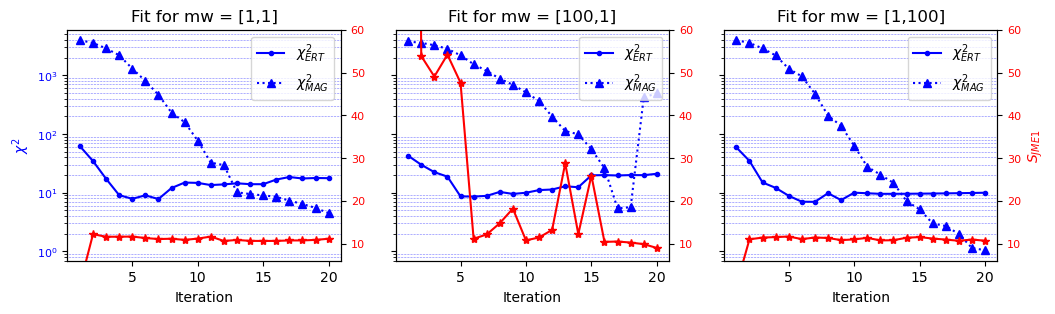

In [34]:
%matplotlib inline
chi = [chi_1_1, chi_100_1, chi_1_100]
S = [S_1_1, S_100_1, S_1_100]
names = ['mw = [1,1]','mw = [100,1]','mw = [1,100]']

it = np.arange(20)+1

fig,ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,3))

for i in [0,1,2]:
    ax[i].plot(it,chi[i][0,:],'b.-', label=r'$\chi^2_{ERT}$')
    ax[i].plot(it,chi[i][1,:],'b^:', label=r'$\chi^2_{MAG}$')

    ax[i].set_yscale('log')
    ax[i].set_xlabel('Iteration')
    ax[i].tick_params(axis ='y', which='both', labelcolor='blue', labelsize=8)
    ax[i].set_title(f'Fit for {names[i]}')
    ax[i].grid(which='minor',axis='y', color='blue', linestyle=':', linewidth=0.4)
    ax[i].legend()
    
    ax2 = ax[i].twinx()
            
    ax2.plot(it,S[i],'r*-', label=r'$S_{JME1}$')
    ax2.tick_params(axis ='y', which='both', labelcolor='red', labelsize=8)
    ax2.grid(which='minor',axis='y', color='red', linestyle=':', linewidth=0.4)
    # ax2.set_yscale('log')
    ax2.set_ylim(6,60)

ax[0].set_ylabel('$\chi^2$', color='blue')
ax2.set_ylabel(r'$S_{JME1}$', color='red')  

# fig.suptitle('Data fit for different method weighting factors', fontsize=16, x=0.5, y=1.05)

plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/JME_mw_fit.pdf', 
            bbox_inches='tight',
            dpi=600)

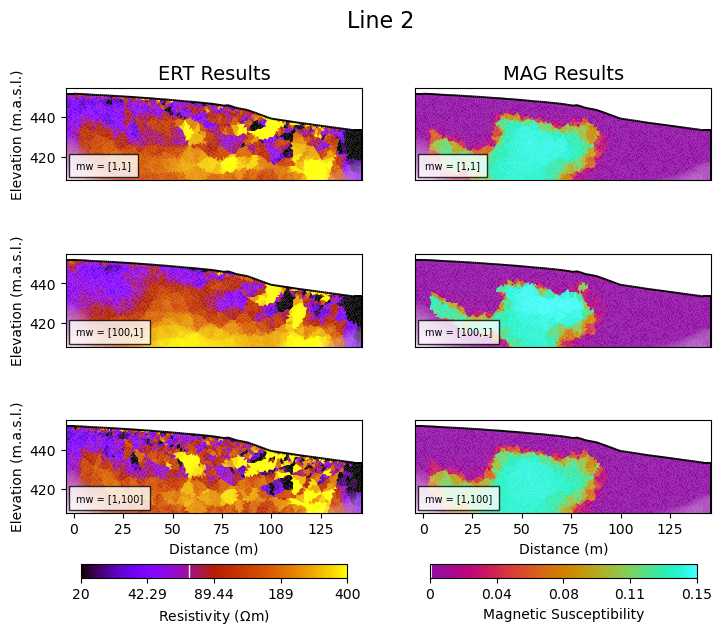

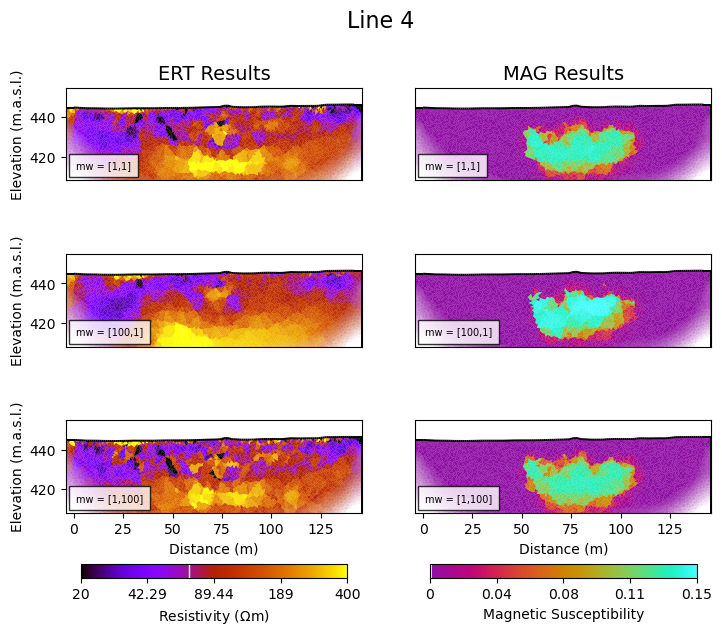

In [12]:
%matplotlib inline
cov_list = [cov1, cov2, cov3, cov4]

lines = [l1,l2,l3,l4]

for i,j in enumerate([1,3]):

    ert_start = pg.Vector(m_list[j].cellCount(), 67.413)
    mag_start = pg.Vector(m_list[j].cellCount(), 1e-4)


    fig, ax, [cax1, cax2] = plotJointResultsComparison(m_list[j], cov_list[j],
                                                       [res_jme3_int_nn[j],res_jme4_int_nn[j],res_jme5_int_nn[j]], 
                                                       [sus_jme3_int_nn[j],sus_jme4_int_nn[j],sus_jme5_int_nn[j]],
                                                       c_ert, c_mag, lim_ert, lim_mag, ['JME13','JME14','JME5'], 
                                                       figsize=(7,5))

    ax[0,0].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,0].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,0].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax[0,1].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,1].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,1].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    # fig.delaxes(ax[0,1])
    ax[0,1].set_title('MAG Results', fontsize = 14)
    
    fig.suptitle(f'Line {j+1}', fontsize = 16, x=0.51, y=1.1)
    
    cax1.plot([67.413]*2,[0,1], 'w', lw=1)
    cax2.plot([1e-4]*2,[0,1], 'w', lw=2)

    plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-5/JME_mw_models_l{j+1}.pdf', 
            bbox_inches='tight',
            dpi=600)

### Compare all

In [66]:
%matplotlib qt
cov_list = [cov1, cov2, cov3, cov4]

lines = [l1,l2,l3,l4]
for j in [0,1,2,3]:

    ert_start = pg.Vector(m_list[j].cellCount(), 67.413)
    mag_start = pg.Vector(m_list[j].cellCount(), 1e-4)


    fig, ax, [cax1, cax2] = plotJointResultsComparison(m_list[j], cov_list[j],
                                                       [res_jme1_int_nn[j],res_jme2_int_nn[j],res_jme3_int_nn[j],res_jme4_int_nn[j],res_jme5_int_nn[j]], 
                                                       [sus_jme1_int_nn[j],sus_jme2_int_nn[j],sus_jme3_int_nn[j],sus_jme4_int_nn[j],sus_jme5_int_nn[j]],
                                                       c_ert, c_mag, lim_ert, lim_mag, ['JME11','JME12','JME13','JME14','JME5'], 
                                                       figsize=(9,8))

    ax[0,0].text(1, 414, 'mw = [3,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,0].text(1, 414, r'mw = [10,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,0].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[3,0].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[4,0].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

    ax[0,1].text(1, 414, 'mw = [3,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[1,1].text(1, 414, '[10,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[2,1].text(1, 414, 'mw = [1,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[3,1].text(1, 414, 'mw = [100,1]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[4,1].text(1, 414, 'mw = [1,100]', fontsize=7, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    # fig.delaxes(ax[0,1])
    ax[0,1].set_title('MAG Results', fontsize = 14)

    for a in ax:
        for axis in a:
            pg.show(lines[j],ax=axis)
            axis.set_ylim(408,455)

### Show misfits for different methods

In [67]:
%matplotlib qt
lim_max = 20
lim = [-lim_max,lim_max] # Misfit limits
label_list = ['mw = [3,1]',r'higher $a_{ERT}$', 'mw = [1,1]','mw = [10,1]','mw = [100,1]']
mag_misfit = [misfit_mag_jme1,misfit_mag_jme2,misfit_mag_jme3,misfit_mag_jme4,misfit_mag_jme5]
ert_misfit = [misfit_ert_jme1,misfit_ert_jme2,misfit_ert_jme3,misfit_ert_jme4,misfit_ert_jme5]

cmap='coolwarm'

from pygimli.physics            import ert
ert_data    = ert.load(fn_dir+fn_all)

fig, ax = plt.subplots(len(label_list),2, figsize=(12,12), gridspec_kw={'width_ratios': [3, 1]})

for i in range(len(label_list)):
    # Plot misfits
    showPseudosections(ert_data, ert_misfit[i], [0, 2055, 4134, 5906, 7694], 4, ax=ax[i,0], clim=lim, cmap=cmap, Type='misfit', 
                       annotation=False, colorBar=False)
    
    showMagMisfit(pnts, 'misfit', mag_misfit[i], ax[i,1], lim=lim_max)
    
    # Add labels
    ax[i,0].text(6, 50, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    ax[i,1].text(2549030, 5569322, label_list[i], fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

# Adjust axes
for ax_ar in ax[:-1,:]:
    for axis in ax_ar:
        axis.set_xticks([])  
        axis.set_xlabel('')

# Add colorbar
cax = ax[-1,0].inset_axes([0.33, -0.4, 0.67, 0.1])
createColorBarOnly(ax=cax, cMin=lim[0], cMax=lim[1], logScale=False,cMap=cmap,
                   label='Misfit (%)', orientation='horizontal')

fig.suptitle(f'Misfit',fontsize=16, x=.51, y=.92)
ax[0,0].set_title('ERT')
ax[0,1].set_title('MAG')
# fig.delaxes(ax[0,1])


# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/Without_Sense/Best_misfit_comp_{q}.pdf', 
#             bbox_inches='tight',
#             dpi=600)

C:\Users\azieg\Desktop\GIT_repositories\APG-MSc-Project-Ziegon\Code\PlotFunctions_Ch5.py:59: UserWarning: The following kwargs were not used by contour: 's', 'edgecolors', 'marker'
  im = ax.tricontourf(x_new[idx_list[i]:idx_list[i+1]],


Text(0.5, 1.0, 'MAG')

In [21]:
%matplotlib widget
res = res_jme3
sus = sus_jme3

mesh['sus'] = sus
mesh['res'] = res

res_lim= res.copy()

for i, r in enumerate(res_lim):
    if r<10:
        res_lim[i] = 10
    elif r>500:
        res_lim[i] = 500

mesh['res_lim'] = res_lim

In [22]:
pl, _ = pg.show(mesh, style="surface", cMap=c_mag, hold=True, notebook=False, alpha=0.3)
pv.drawMesh(pl, mesh, label="res_lim", style="surface", cMap=c_ert, alpha=1,
            filter={"threshold": dict(value=150, scalars='res_lim')})
pv.drawMesh(pl, mesh, label="sus", style="surface", cMap=c_mag, alpha=.8,
            filter={"threshold": dict(value=0.12, scalars="sus")})

# AZdrawSlice_along_line(pl, mesh, cmap=c_mag, pnts=p1, data=mesh["sus"], label="sus")
AZdrawSlice_along_line(pl, mesh, cmap=c_mag, pnts=p2, data=mesh["sus"], label="sus")
# AZdrawSlice_along_line(pl, mesh, cmap=c_mag, pnts=p4, data=mesh["sus"], label="sus")

pv.drawSensors(pl, p1, diam=.5, color='darkolivegreen')
pv.drawSensors(pl, p2, diam=.5, color='limegreen')
pv.drawSensors(pl, p3, diam=.5, color='springgreen')
pv.drawSensors(pl, p4, diam=.5, color='aquamarine')
pv.drawSensors(pl, pnts, diam=.5, color='blue')

pl.show()

In [ ]:
pnts[0][1]



5569391.192